# <div style="text-align: center;">Project 1: Data & Visualization</div>

In [2]:
# Packages
install.packages("tidyverse")
install.packages("ggrepel")
install.packages("ggcorrplot")
install.packages("DT")
install.packages("gridExtra")
install.packages("sf")
install.packages("modeest")
install.packages("factoextra")
install.packages("kableExtra")
install.packages("reshape2")
install.packages("knitr")
install.packages("caret")
install.packages("car")
install.packages("lubridate")

# Libraries
library("tidyverse")
library("ggrepel")
library("ggcorrplot")
library("DT")
library("gridExtra")
library("sf")
library("modeest")
library("knitr")
library("factoextra")
library("reshape2")
library("kableExtra")
library("knitr")
library("stringr")
library("caret")
library("car")
library("lubridate")


The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpP6DJrg/downloaded_packages

The downloaded binary packages 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading req

In [6]:
# Define base directory
# base_dir <- "../../../../../../../Desktop/COVID-19/"
# base_dir <- "C:/Users/leona/OneDrive/CSMS/Data Mining (CS7331)/Projects/Project 1/COVID-19/"
base_dir <- "/Users/salissa/Desktop/Data Mining/Datasets/COVID-19"


# Use file.path() for better compatibility
global_mobility_path <- file.path(base_dir, "Global_Mobility_Report.csv")
covid_cases_census_path <- file.path(base_dir, "c19_census.csv")
covid_cases_tx_path <- file.path(base_dir, "c19_tx.csv")

In [8]:
# Custom function to read CSV files
read_data <- function(file_path, dataset_name) {
  if (file.exists(file_path)) {
    cat(paste0("\n--- Loading ", dataset_name, " ---\n"))
    # Suppress col_type messages
    return(read_csv(file_path, show_col_types = FALSE))
  } else {
    stop(paste0("Error: File not found -> ", file_path))
  }
}

# Load datasets
global_mobility <- read_data(global_mobility_path, "Global Mobility Data")
covid_cases_census <- read_data(covid_cases_census_path, "COVID-19 Cases and Census Data")
covid_cases_tx <- read_data(covid_cases_tx_path, "COVID-19 Cases for Texas")

cat("\n--- All datasets successfully loaded! ---\n")


--- Loading Global Mobility Data ---

--- Loading COVID-19 Cases and Census Data ---

--- Loading COVID-19 Cases for Texas ---

--- All datasets successfully loaded! ---


# 2.2 Covid Cases Census Data

In [11]:
# Randomly display 10 rows
covid_cases_census %>%
  sample_n(10)

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,⋯,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
54015,Clay County,WV,54,2021-01-19,301,4,54015,1076,2289,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
39009,Athens County,OH,39,2021-01-19,3675,9,39009,10102,12407,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
45063,Lexington County,SC,45,2021-01-19,22147,323,45063,34871,74380,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
24045,Wicomico County,MD,24,2021-01-19,5791,103,24045,12990,24425,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
42041,Cumberland County,PA,42,2021-01-19,12801,375,42041,35064,62855,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
51175,Southampton County,VA,51,2021-01-19,1595,45,51175,1736,4928,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
48375,Potter County,TX,48,2021-01-19,15947,302,48375,15164,28289,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
54091,Taylor County,WV,54,2021-01-19,910,15,54091,2344,4272,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
28081,Lee County,MS,28,2021-01-19,8864,141,28081,10491,21994,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [13]:
# View of data
glimpse(covid_cases_census)

Rows: 3,142
Columns: 259
$ county_fips_code                                               <chr> "50009"…
$ county_name                                                    <chr> "Essex …
$ state                                                          <chr> "VT", "…
$ state_fips_code                                                <chr> "50", "…
$ date                                                           <date> 2021-0…
$ confirmed_cases                                                <dbl> 111, 36…
$ deaths                                                         <dbl> 0, 78, …
$ geo_id                                                         <chr> "50009"…
$ nonfamily_households                                           <dbl> 994, 27…
$ family_households                                              <dbl> 1726, 3…
$ median_year_structure_built                                    <dbl> 1973, 1…
$ rent_burden_not_computed                                       <dbl> 64, 115…
$ rent_over_50_

In [15]:
# comnbine income to create a less than $20k
covid_cases_census <- covid_cases_census %>%
  mutate(income_less_20000 = income_less_10000 + income_10000_14999 + income_15000_19999)

In [17]:
# Rename columns and filter for key variables
covid_census_filtered <- covid_cases_census %>%
    select(
        county = county_name,
        state,
        cases = confirmed_cases,
        deaths,
        population = total_pop,
        median_income,
        public_trans_commuters = commuters_by_public_transportation,
        food_stamps = households_public_asst_or_food_stamps,
        work_from_home = worked_at_home,
        poverty,
        income_below_20k = income_less_20000
    )

In [19]:
covid_census_filtered %>%
    head()

county,state,cases,deaths,population,median_income,public_trans_commuters,food_stamps,work_from_home,poverty,income_below_20k
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Essex County,VT,111,0,6203,38767,4,575,167,960,673
Chittenden County,VT,3636,78,160985,66906,2336,6748,4783,17057,8660
Kent County,DE,11548,187,173145,57647,903,10685,3270,21743,9333
Washington County,RI,5521,122,126190,77862,702,4350,3110,11569,6036
Belknap County,NH,2496,79,60383,65834,11,2512,1487,5421,3259
Newport County,RI,3578,6,83204,75463,825,3581,2711,7178,4801


In [21]:
# Verify column name change
colnames(covid_census_filtered)

[1] "county"                 "state"                  "cases"                 
 [4] "deaths"                 "population"             "median_income"         
 [7] "public_trans_commuters" "food_stamps"            "work_from_home"        
[10] "poverty"                "income_below_20k"

In [23]:
# View filtered variables
glimpse(covid_census_filtered)

Rows: 3,142
Columns: 11
$ county                 <chr> "Essex County", "Chittenden County", "Kent Coun…
$ state                  <chr> "VT", "VT", "DE", "RI", "NH", "RI", "VT", "CT",…
$ cases                  <dbl> 111, 3636, 11548, 5521, 2496, 3578, 312, 6255, …
$ deaths                 <dbl> 0, 78, 187, 122, 79, 6, 1, 125, 5, 4, 2, 1104, …
$ population             <dbl> 6203, 160985, 173145, 126190, 60383, 83204, 251…
$ median_income          <dbl> 38767, 66906, 57647, 77862, 65834, 75463, 54899…
$ public_trans_commuters <dbl> 4, 2336, 903, 702, 11, 825, 66, 1572, 139, 17, …
$ food_stamps            <dbl> 575, 6748, 10685, 4350, 2512, 3581, 1408, 4556,…
$ work_from_home         <dbl> 167, 4783, 3270, 3110, 1487, 2711, 906, 3821, 1…
$ poverty                <dbl> 960, 17057, 21743, 11569, 5421, 7178, 3439, 879…
$ income_below_20k       <dbl> 673, 8660, 9333, 6036, 3259, 4801, 1836, 5178, …


In [25]:
# Filter dataset for Texas counties
covid_census_tx <- covid_census_filtered %>%
  filter(state == "TX")

# Convert categorical variables to factors
covid_census_tx <- covid_census_tx %>%
  mutate(
    county = as.factor(county),
    state = as.factor(state)
  )

# Verify changes
glimpse(covid_census_tx)

Rows: 254
Columns: 11
$ county                 <fct> Hansford County, Stonewall County, Cochran Coun…
$ state                  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ cases                  <dbl> 673, 134, 216, 472, 467, 118, 11, 114, 1475, 17…
$ deaths                 <dbl> 17, 4, 12, 13, 12, 11, 0, 3, 46, 7, 6, 6, 5, 11…
$ population             <dbl> 5532, 1084, 2932, 3836, 8145, 3067, 289, 1591, …
$ median_income          <dbl> 40678, 46786, 37500, 52310, 42367, 54961, 56964…
$ public_trans_commuters <dbl> 9, 0, 7, 0, 2, 7, 0, 0, 12, 2, 0, 0, 0, 19, 0, …
$ food_stamps            <dbl> 126, 41, 162, 143, 600, 23, 3, 88, 881, 162, 10…
$ work_from_home         <dbl> 18, 7, 23, 60, 61, 38, 7, 78, 120, 10, 79, 66, …
$ poverty                <dbl> 1017, 143, 717, 787, 1296, 448, 10, 220, 1590, …
$ income_below_20k       <dbl> 376, 135, 320, 196, 781, 161, 7, 147, 602, 201,…


In [27]:
# Check for missing values
missing_values <- covid_census_tx %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(covid_census_tx)) * 100)

# View missing values summary
print(missing_values)

# A tibble: 11 × 3
   column                 missing_count missing_pct
   <chr>                          <int>       <dbl>
 1 county                             0           0
 2 state                              0           0
 3 cases                              0           0
 4 deaths                             0           0
 5 population                         0           0
 6 median_income                      0           0
 7 public_trans_commuters             0           0
 8 food_stamps                        0           0
 9 work_from_home                     0           0
10 poverty                            0           0
11 income_below_20k                   0           0


In [29]:
# Remove missing values 
covid_census_tx <- covid_census_tx %>%
  drop_na(county, cases, deaths, population, median_income, public_trans_commuters, 
          food_stamps, work_from_home, poverty, income_below_20k)

# Check how much data is left
cat("Remaining rows after missing value removal:", nrow(covid_census_tx), "\n")

# Check summary statistics of the cleaned dataset
summary(covid_census_tx)

Remaining rows after missing value removal: 254 


              county    state        cases            deaths       
 Anderson County :  1   TX:254   Min.   :     1   Min.   :   0.00  
 Andrews County  :  1            1st Qu.:   487   1st Qu.:  13.00  
 Angelina County :  1            Median :  1310   Median :  30.00  
 Aransas County  :  1            Mean   :  8419   Mean   : 127.48  
 Archer County   :  1            3rd Qu.:  3502   3rd Qu.:  78.75  
 Armstrong County:  1            Max.   :286356   Max.   :3825.00  
 (Other)         :248                                              
   population      median_income   public_trans_commuters  food_stamps      
 Min.   :     74   Min.   :24794   Min.   :    0.00       Min.   :     0.0  
 1st Qu.:   7072   1st Qu.:42326   1st Qu.:    0.00       1st Qu.:   284.8  
 Median :  18612   Median :48311   Median :   10.00       Median :   884.0  
 Mean   : 107951   Mean   :49894   Mean   :  737.44       Mean   :  4863.4  
 3rd Qu.:  49295   3rd Qu.:55741   3rd Qu.:   56.75       3rd Qu.:  231

In [31]:
# Identify duplicate rows
duplicates <- covid_census_tx %>%
    filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicates
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [33]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  covid_census_tx <- covid_census_tx %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(covid_census_tx), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [35]:
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for key socioeconomic and COVID-19 variables
outlier_summary <- covid_census_tx %>%
  summarize(across(
    c(cases, deaths, population, median_income, public_trans_commuters, 
      food_stamps, work_from_home, poverty, income_below_20k),
    count_outliers,
    .names = "{.col}_outliers"
  )) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the outlier summary table
print(outlier_summary, width=Inf)

# A tibble: 9 × 2
  Column                          Outlier_Count
  <chr>                                   <int>
1 cases_outliers                             40
2 deaths_outliers                            37
3 population_outliers                        39
4 median_income_outliers                     10
5 public_trans_commuters_outliers            39
6 food_stamps_outliers                       33
7 work_from_home_outliers                    36
8 poverty_outliers                           31
9 income_below_20k_outliers                  29


In [37]:
# Custom function to check if value is NOT outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers 
covid_census_tx_cleaned <- covid_census_tx %>%
  filter(
    is_not_outlier(cases) &
    is_not_outlier(deaths) &
    is_not_outlier(population) &
    is_not_outlier(median_income) &
    is_not_outlier(public_trans_commuters) &
    is_not_outlier(food_stamps) &
    is_not_outlier(work_from_home) &
    is_not_outlier(poverty) &
    is_not_outlier(income_below_20k)
  )

# How many rows were removed
rows_removed <- nrow(covid_census_tx) - nrow(covid_census_tx_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 51 


In [39]:
# Stats after cleaning data
summary(covid_census_tx_cleaned)

              county    state        cases            deaths      
 Anderson County :  1   TX:203   Min.   :  11.0   Min.   :  0.00  
 Andrews County  :  1            1st Qu.: 411.5   1st Qu.: 11.00  
 Aransas County  :  1            Median : 967.0   Median : 22.00  
 Archer County   :  1            Mean   :1469.5   Mean   : 33.29  
 Armstrong County:  1            3rd Qu.:1975.5   3rd Qu.: 48.00  
 Atascosa County :  1            Max.   :7008.0   Max.   :158.00  
 (Other)         :197                                             
   population    median_income   public_trans_commuters  food_stamps    
 Min.   :  289   Min.   :24794   Min.   :  0.00         Min.   :   0.0  
 1st Qu.: 5573   1st Qu.:41591   1st Qu.:  0.00         1st Qu.: 231.5  
 Median :13095   Median :46685   Median :  2.00         Median : 647.0  
 Mean   :20062   Mean   :47509   Mean   : 16.07         Mean   : 973.5  
 3rd Qu.:26477   3rd Qu.:52490   3rd Qu.: 22.50         3rd Qu.:1317.5  
 Max.   :93635   Max.   :7

In [41]:
# Verify rows, columns, data types
glimpse(covid_census_tx_cleaned)

Rows: 203
Columns: 11
$ county                 <fct> Hansford County, Stonewall County, Cochran Coun…
$ state                  <fct> TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX, TX,…
$ cases                  <dbl> 673, 134, 216, 472, 467, 118, 11, 114, 1475, 17…
$ deaths                 <dbl> 17, 4, 12, 13, 12, 11, 0, 3, 46, 7, 6, 6, 5, 11…
$ population             <dbl> 5532, 1084, 2932, 3836, 8145, 3067, 289, 1591, …
$ median_income          <dbl> 40678, 46786, 37500, 52310, 42367, 54961, 56964…
$ public_trans_commuters <dbl> 9, 0, 7, 0, 2, 7, 0, 0, 12, 2, 0, 0, 0, 19, 34,…
$ food_stamps            <dbl> 126, 41, 162, 143, 600, 23, 3, 88, 881, 162, 10…
$ work_from_home         <dbl> 18, 7, 23, 60, 61, 38, 7, 78, 120, 10, 79, 66, …
$ poverty                <dbl> 1017, 143, 717, 787, 1296, 448, 10, 220, 1590, …
$ income_below_20k       <dbl> 376, 135, 320, 196, 781, 161, 7, 147, 602, 201,…


In [43]:
# Function to compute key statistics
compute_census_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x)[1],
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define key census variables for analysis
census_variables <- c("cases", "deaths", "population", "median_income", 
                      "public_trans_commuters", "food_stamps", 
                      "work_from_home", "poverty", 
                      "income_below_20k")

# Compute statistics
census_stats_table <- compute_census_stats(covid_census_tx_cleaned, census_variables)

census_stats_long <- census_stats_table %>%
  pivot_longer(
    cols = everything(),
    names_to = "Combined",
    values_to = "Value"
  ) %>%
  mutate(
    Variable = str_extract(Combined, "^[^_]+"),  # Extract the first part (Variable)
    Statistic = str_extract(Combined, "[^_]+$")  # Extract the last part (Statistic)
  ) %>%
  select(Variable, Statistic, Value) %>%  
  pivot_wider(
    names_from = "Statistic", 
    values_from = "Value",
    values_fn = list  
  ) %>%
  mutate(across(where(is.list), ~ map_dbl(.x, ~ .x[1])))  

# Print the formatted table
kable(census_stats_long, digits = 0)



|Variable   | Range|  Mode|  Mean| Median|  Variance|    SD|
|:----------|-----:|-----:|-----:|------:|---------:|-----:|
|cases      |  6997|   207|  1470|    967|   2117934|  1455|
|deaths     |   158|    20|    33|     22|       927|    30|
|population | 93346|   289| 20062|  13095| 402106159| 20053|
|median     | 49574| 42500| 47509|  46685|  92474203|  9616|
|public     |   125|     0|    16|      2|       636|    25|
|food       |  5324|    97|   974|    647|   1084979|  1042|
|work       |  1552|     0|   293|    181|    109061|   330|
|poverty    | 16420|   140|  3162|   2078|  10510456|  3242|
|income     |  7184|   169|  1379|   1001|   1829204|  1352|

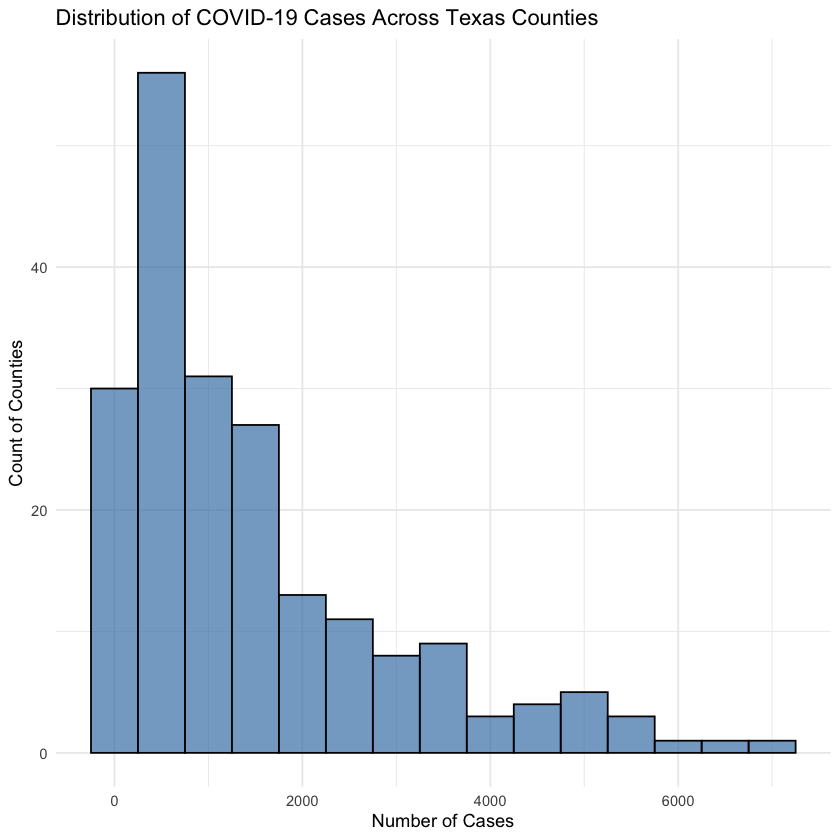

In [45]:
# 1. Distribution of COVID-19 Cases Histogram
ggplot(covid_census_tx_cleaned, aes(x = cases)) +
  geom_histogram(binwidth = 500, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Cases Across Texas Counties",
       x = "Number of Cases", y = "Count of Counties") +
  theme_minimal()

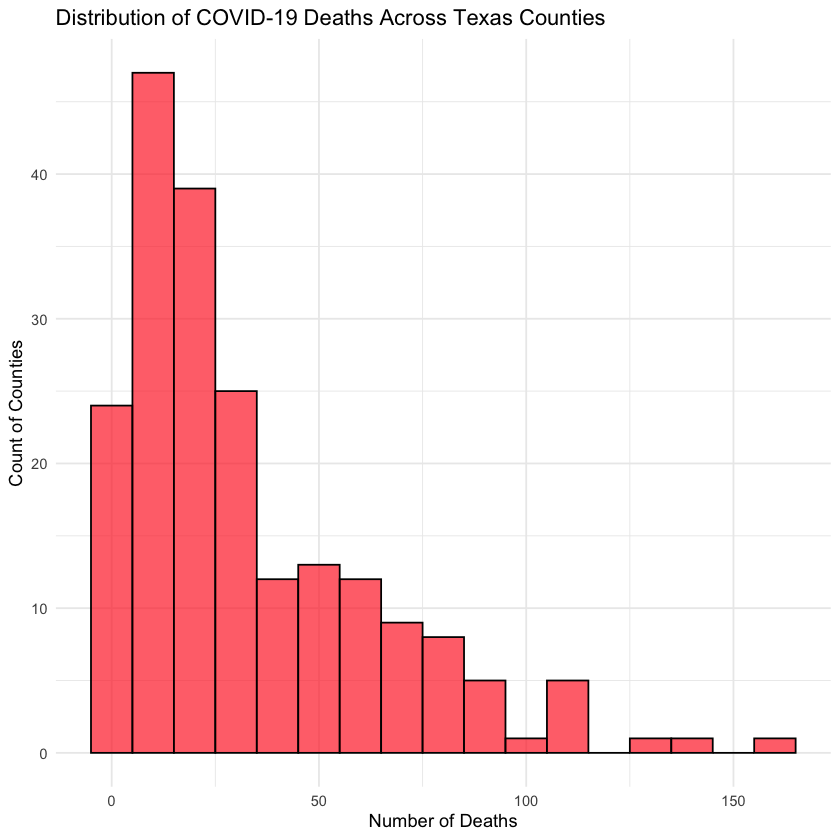

In [47]:
# 2. COVID-19 Cases vs. Population Histogram
ggplot(covid_census_tx_cleaned, aes(x = deaths)) +
  geom_histogram(binwidth = 10, fill = "firebrick1", color = "black", alpha = 0.7) +
  labs(title = "Distribution of COVID-19 Deaths Across Texas Counties",
       x = "Number of Deaths", y = "Count of Counties") +
  theme_minimal()

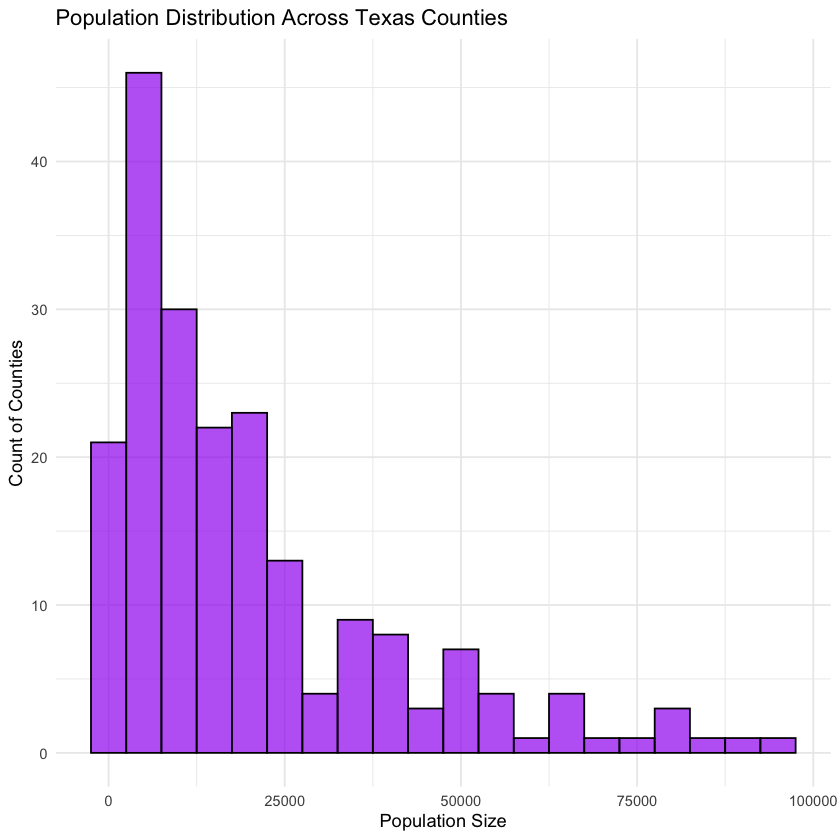

In [49]:
# 3. Histogram for Population Size
ggplot(covid_census_tx_cleaned, aes(x = population)) +
  geom_histogram(binwidth = 5000, fill = "purple", color = "black", alpha = 0.7) +
  labs(title = "Population Distribution Across Texas Counties",
       x = "Population Size", y = "Count of Counties") +
  theme_minimal()

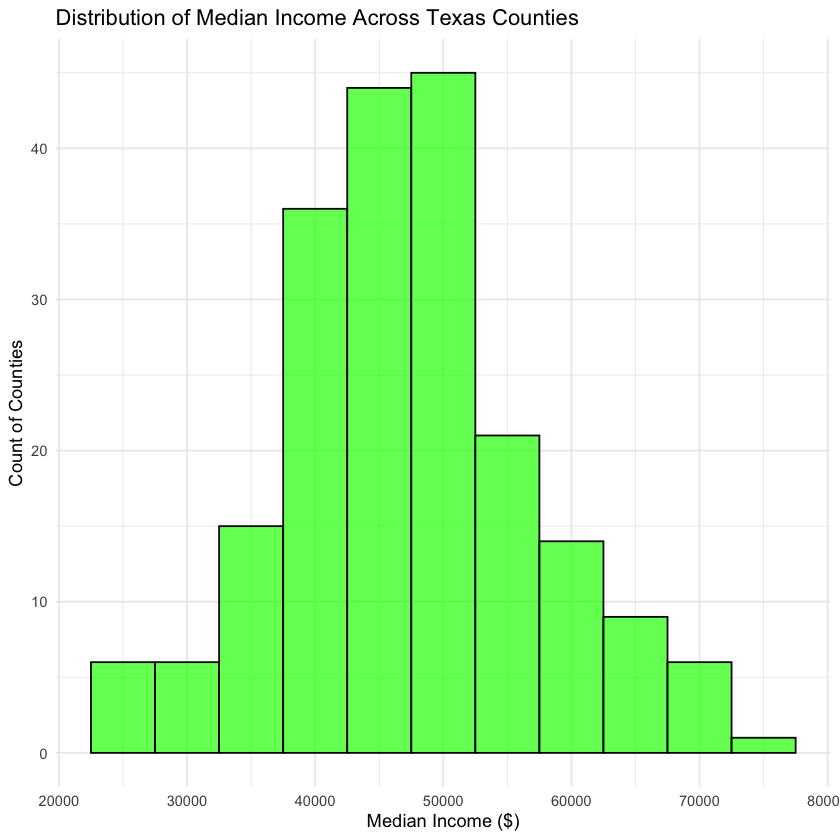

In [51]:
# 4. Median Income Distribution Histogram
ggplot(covid_census_tx_cleaned, aes(x = median_income)) +
  geom_histogram(binwidth = 5000, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Median Income Across Texas Counties",
       x = "Median Income ($)", y = "Count of Counties") +
  theme_minimal()

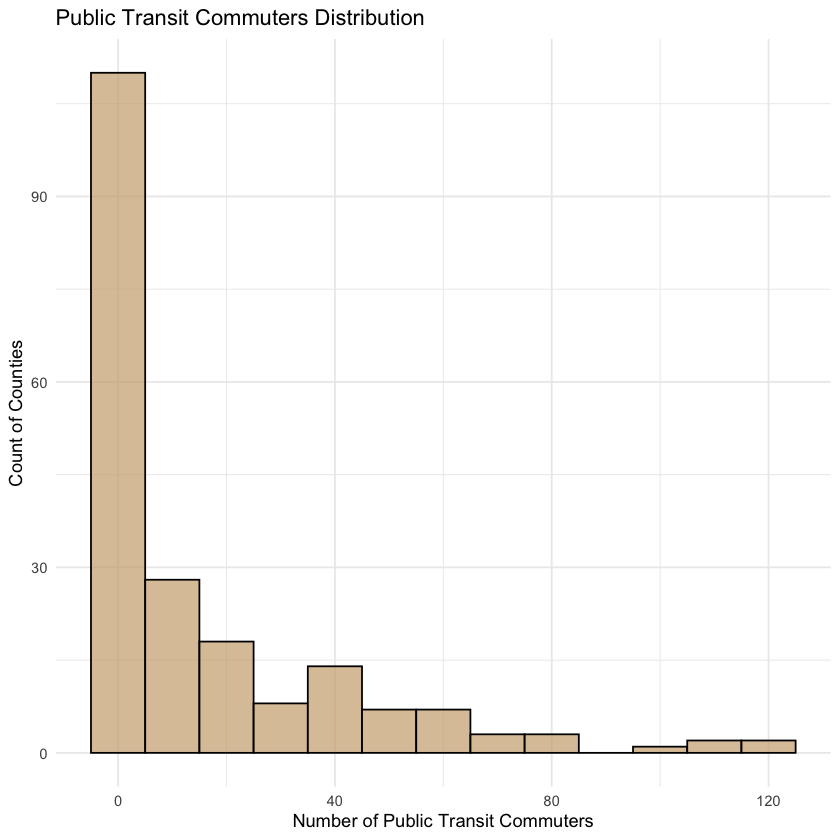

In [53]:
# 5. Public Transportation Commuters
ggplot(covid_census_tx_cleaned, aes(x = public_trans_commuters)) +
  geom_histogram(binwidth = 10, fill = "burlywood3", color = "black", alpha = 0.7) +
  labs(title = "Public Transit Commuters Distribution",
       x = "Number of Public Transit Commuters", y = "Count of Counties") +
  theme_minimal()

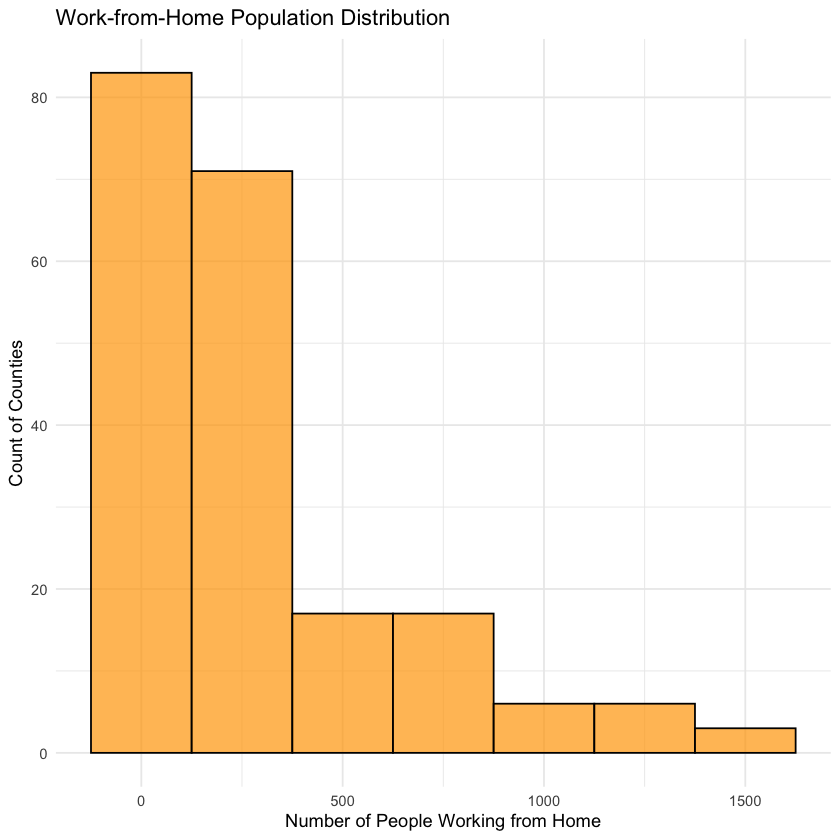

In [55]:
# 6. Work from home
ggplot(covid_census_tx_cleaned, aes(x = work_from_home)) +
  geom_histogram(binwidth = 250, fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Work-from-Home Population Distribution",
       x = "Number of People Working from Home", y = "Count of Counties") +
  theme_minimal()

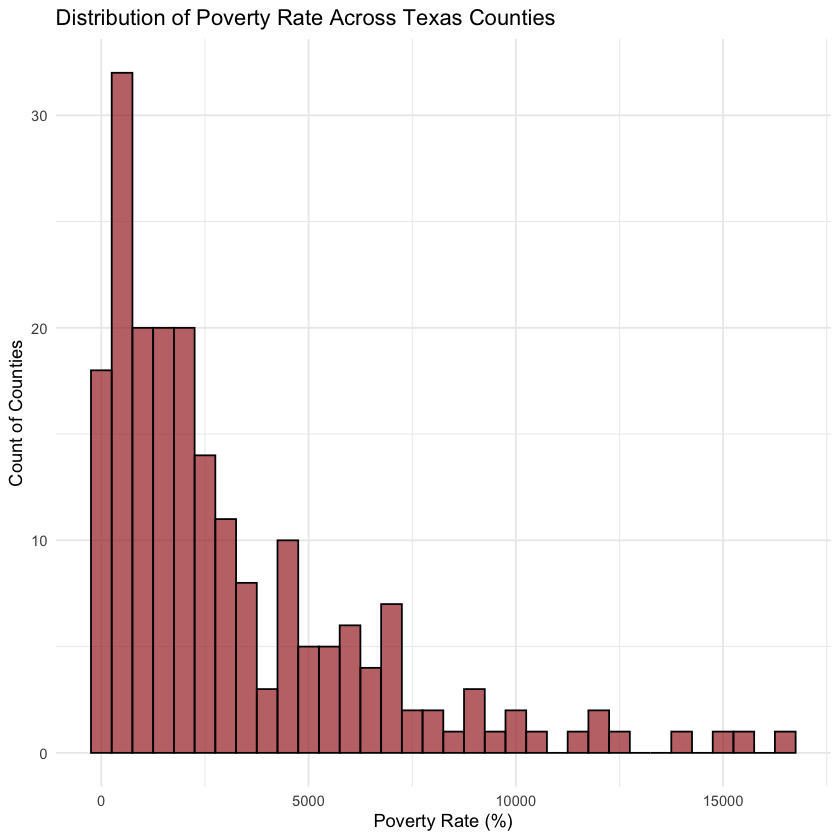

In [57]:
# 6. Poverty Rate
ggplot(covid_census_tx_cleaned, aes(x = poverty)) +
  geom_histogram(binwidth = 500, fill = "brown", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Poverty Rate Across Texas Counties",
       x = "Poverty Rate (%)", y = "Count of Counties") +
  theme_minimal()

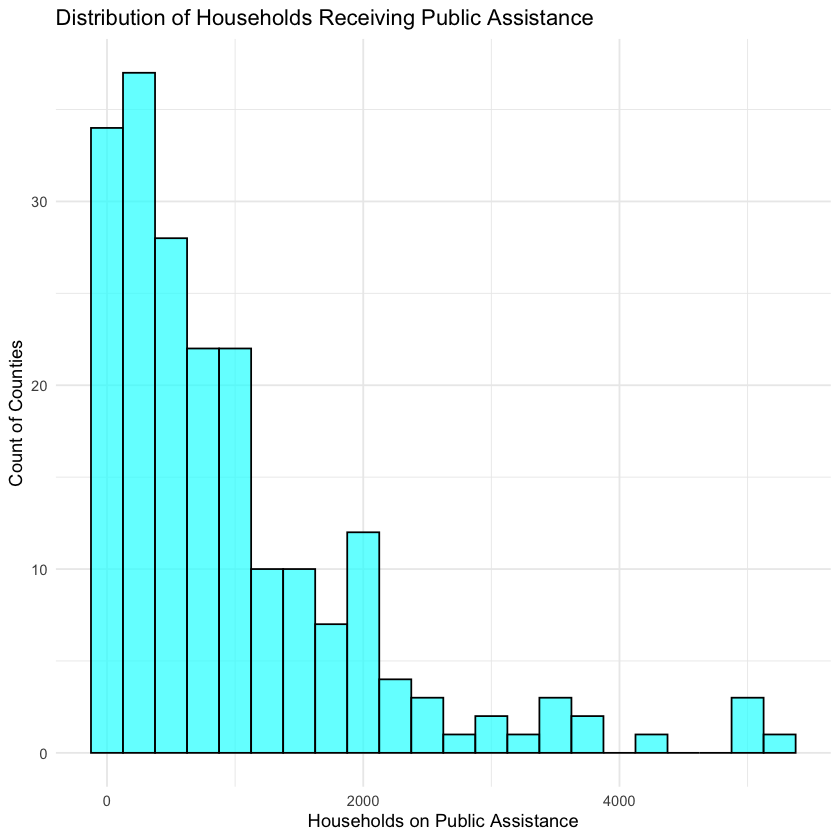

In [59]:
# 7. Public assistance or food stamps
ggplot(covid_census_tx_cleaned, aes(x = food_stamps)) +
  geom_histogram(binwidth = 250, fill = "cyan", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Households Receiving Public Assistance",
       x = "Households on Public Assistance", y = "Count of Counties") +
  theme_minimal()

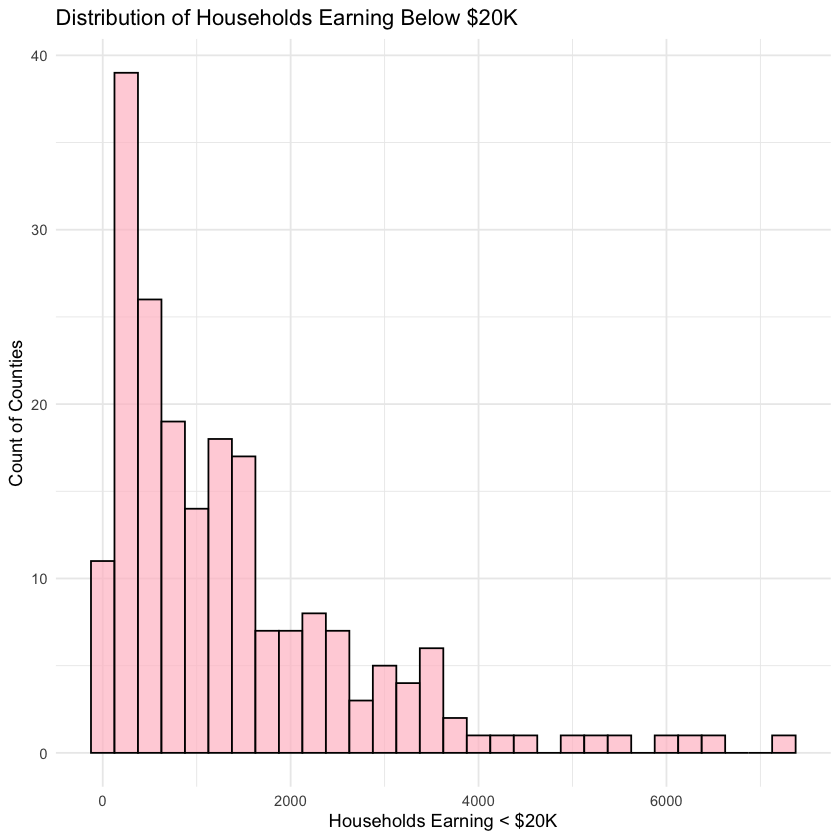

In [61]:
# 8. Household earnings below $10K
ggplot(covid_census_tx_cleaned, aes(x = income_below_20k)) +
  geom_histogram(binwidth = 250, fill = "pink", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Households Earning Below $20K",
       x = "Households Earning < $20K", y = "Count of Counties") +
  theme_minimal()

In [63]:
# Compute county-level averages for COVID-19 cases and deaths
county_covid_summary <- covid_census_tx_cleaned %>%
  group_by(county) %>%
  summarize(
    avg_cases = mean(cases, na.rm = TRUE),
    avg_deaths = mean(deaths, na.rm = TRUE),
    avg_poverty = mean(poverty, na.rm = TRUE),
    avg_income = mean(median_income, na.rm = TRUE),
    avg_public_trans = mean(public_trans_commuters, na.rm = TRUE),
    avg_work_from_home = mean(work_from_home, na.rm = TRUE)
  ) %>%
  arrange(desc(avg_cases))  

# View first few rows
head(county_covid_summary)

county,avg_cases,avg_deaths,avg_poverty,avg_income,avg_public_trans,avg_work_from_home
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Walker County,7008,93,12653,41456,30,900
Val Verde County,6331,158,9849,44609,71,695
Orange County,5946,81,11759,53667,67,605
Hale County,5668,135,6358,46012,50,446
Anderson County,5575,75,6935,42313,39,674
Wise County,5384,84,8042,59081,39,1552


In [65]:
# CASE STUDY: Filter dataset for Walker County and Val Verde County
walker_data <- covid_census_tx_cleaned %>%
  filter(county == "Walker County")

val_verde_data <- covid_census_tx_cleaned %>%
  filter(county == "Val Verde County")

# View summary statistics for both counties
summary(walker_data)
summary(val_verde_data)

# Check total cases and deaths in Walker County
walker_cases <- sum(walker_data$cases, na.rm = TRUE)
walker_deaths <- sum(walker_data$deaths, na.rm = TRUE)
cat("Total Cases in Walker County:", walker_cases, "\n")
cat("Total Deaths in Walker County:", walker_deaths, "\n")

# Check total cases and deaths in Val Verde County
val_verde_cases <- sum(val_verde_data$cases, na.rm = TRUE)
val_verde_deaths <- sum(val_verde_data$deaths, na.rm = TRUE)
cat("Total Cases in Val Verde County:", val_verde_cases, "\n")
cat("Total Deaths in Val Verde County:", val_verde_deaths, "\n")

# Compute per capita case and death rates for Walker County
walker_per_capita_cases <- walker_cases / sum(walker_data$population) * 100
walker_per_capita_deaths <- walker_deaths / sum(walker_data$population) * 100

cat("Cases per 100 people in Walker County:", walker_per_capita_cases, "\n")
cat("Deaths per 100 people in Walker County:", walker_per_capita_deaths, "\n")

# Compute per capita case and death rates for Val Verde County
val_verde_per_capita_cases <- val_verde_cases / sum(val_verde_data$population) * 100
val_verde_per_capita_deaths <- val_verde_deaths / sum(val_verde_data$population) * 100

cat("Cases per 100 people in Val Verde County:", val_verde_per_capita_cases, "\n")
cat("Deaths per 100 people in Val Verde County:", val_verde_per_capita_deaths, "\n")

             county  state      cases          deaths     population   
 Walker County  :1   TX:1   Min.   :7008   Min.   :93   Min.   :70818  
 Anderson County:0          1st Qu.:7008   1st Qu.:93   1st Qu.:70818  
 Andrews County :0          Median :7008   Median :93   Median :70818  
 Angelina County:0          Mean   :7008   Mean   :93   Mean   :70818  
 Aransas County :0          3rd Qu.:7008   3rd Qu.:93   3rd Qu.:70818  
 Archer County  :0          Max.   :7008   Max.   :93   Max.   :70818  
 (Other)        :0                                                     
 median_income   public_trans_commuters  food_stamps   work_from_home
 Min.   :41456   Min.   :30             Min.   :1324   Min.   :900   
 1st Qu.:41456   1st Qu.:30             1st Qu.:1324   1st Qu.:900   
 Median :41456   Median :30             Median :1324   Median :900   
 Mean   :41456   Mean   :30             Mean   :1324   Mean   :900   
 3rd Qu.:41456   3rd Qu.:30             3rd Qu.:1324   3rd Qu.:900   
 Max

              county  state      cases          deaths      population   
 Val Verde County:1   TX:1   Min.   :6331   Min.   :158   Min.   :48976  
 Anderson County :0          1st Qu.:6331   1st Qu.:158   1st Qu.:48976  
 Andrews County  :0          Median :6331   Median :158   Median :48976  
 Angelina County :0          Mean   :6331   Mean   :158   Mean   :48976  
 Aransas County  :0          3rd Qu.:6331   3rd Qu.:158   3rd Qu.:48976  
 Archer County   :0          Max.   :6331   Max.   :158   Max.   :48976  
 (Other)         :0                                                      
 median_income   public_trans_commuters  food_stamps   work_from_home
 Min.   :44609   Min.   :71             Min.   :3400   Min.   :695   
 1st Qu.:44609   1st Qu.:71             1st Qu.:3400   1st Qu.:695   
 Median :44609   Median :71             Median :3400   Median :695   
 Mean   :44609   Mean   :71             Mean   :3400   Mean   :695   
 3rd Qu.:44609   3rd Qu.:71             3rd Qu.:3400   3rd

Total Cases in Walker County: 7008 
Total Deaths in Walker County: 93 
Total Cases in Val Verde County: 6331 
Total Deaths in Val Verde County: 158 
Cases per 100 people in Walker County: 9.895789 
Deaths per 100 people in Walker County: 0.1313225 
Cases per 100 people in Val Verde County: 12.92674 
Deaths per 100 people in Val Verde County: 0.322607 


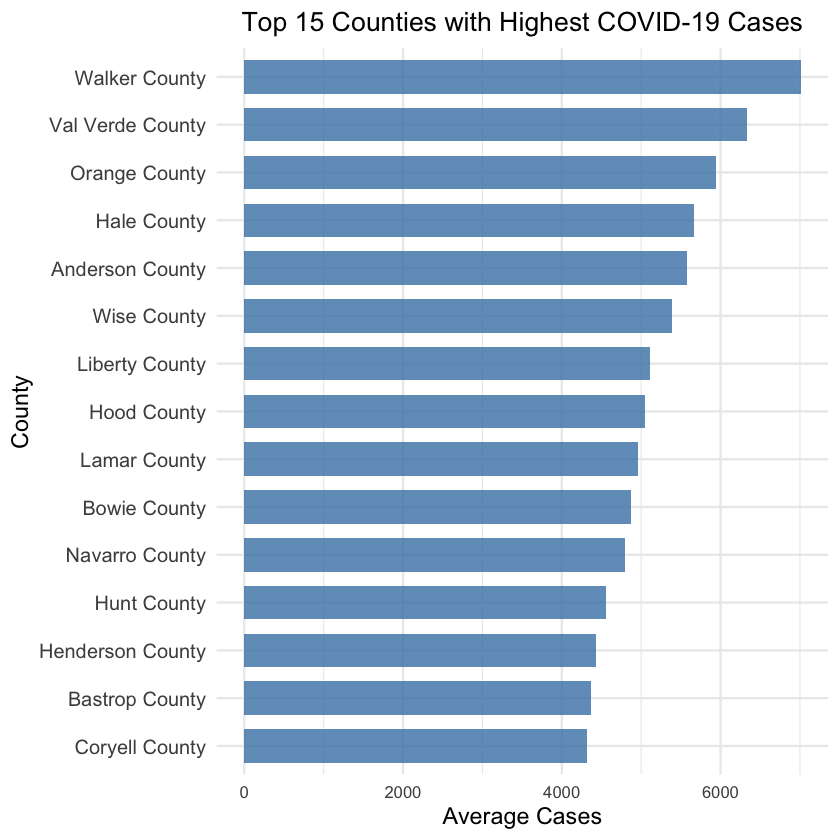

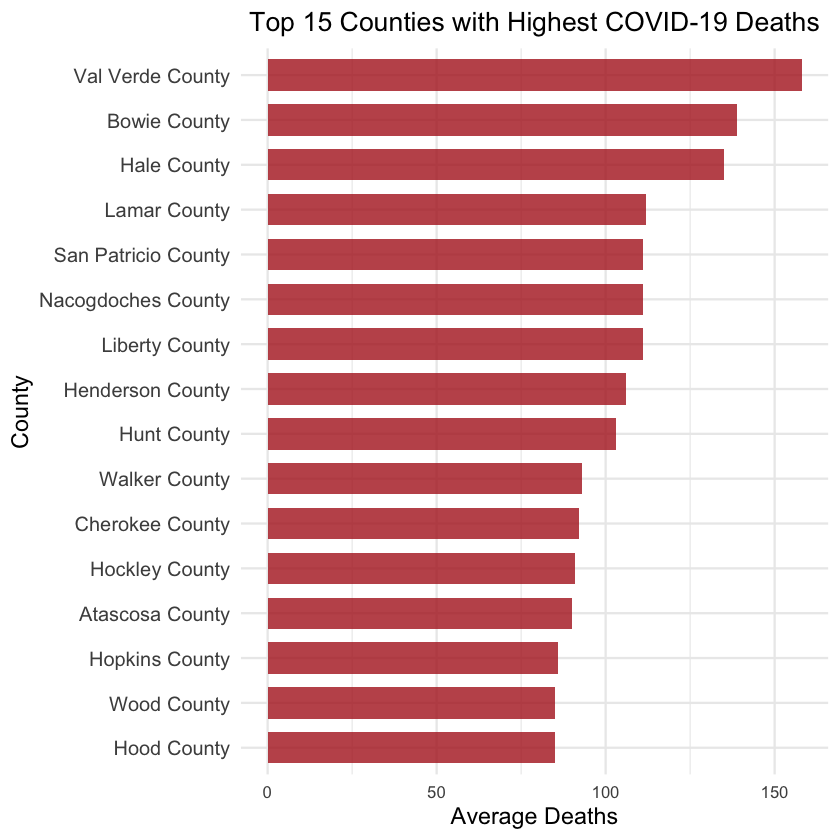

In [67]:
# Select the top 15 counties with the highest avg_cases
top_counties_cases <- county_covid_summary %>%
  slice_max(avg_cases, n = 15)

# Bar plot for highest COVID-19 cases
ggplot(top_counties_cases, aes(x = reorder(county, avg_cases), y = avg_cases)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties with Highest COVID-19 Cases",
       x = "County", y = "Average Cases") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10))

# Select the top 15 counties with the highest avg_deaths
top_counties_deaths <- county_covid_summary %>%
  slice_max(avg_deaths, n = 15)

# Bar plot for highest COVID-19 deaths
ggplot(top_counties_deaths, aes(x = reorder(county, avg_deaths), y = avg_deaths)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties with Highest COVID-19 Deaths",
       x = "County", y = "Average Deaths") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10))

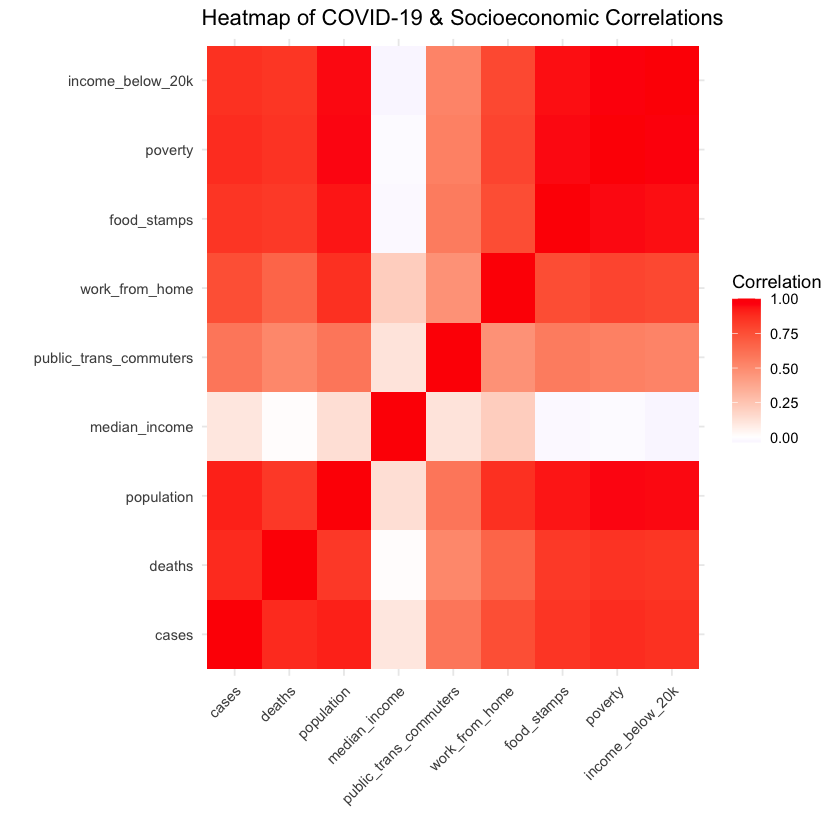

In [69]:
# Correlation Heatmap
census_vars <- covid_census_tx_cleaned %>%
  select(cases, deaths, population, median_income, 
         public_trans_commuters, work_from_home, food_stamps,
         poverty, income_below_20k)

# Compute correlation matrix
cor_matrix <- cor(census_vars, use = "complete.obs")

# Convert to long format for ggplot
heatmap_melted <- melt(cor_matrix)

# Plot heatmap before calculating the correlation matrix for the table
ggplot(heatmap_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  labs(title = "Heatmap of COVID-19 & Socioeconomic Correlations",
       x = "", y = "", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

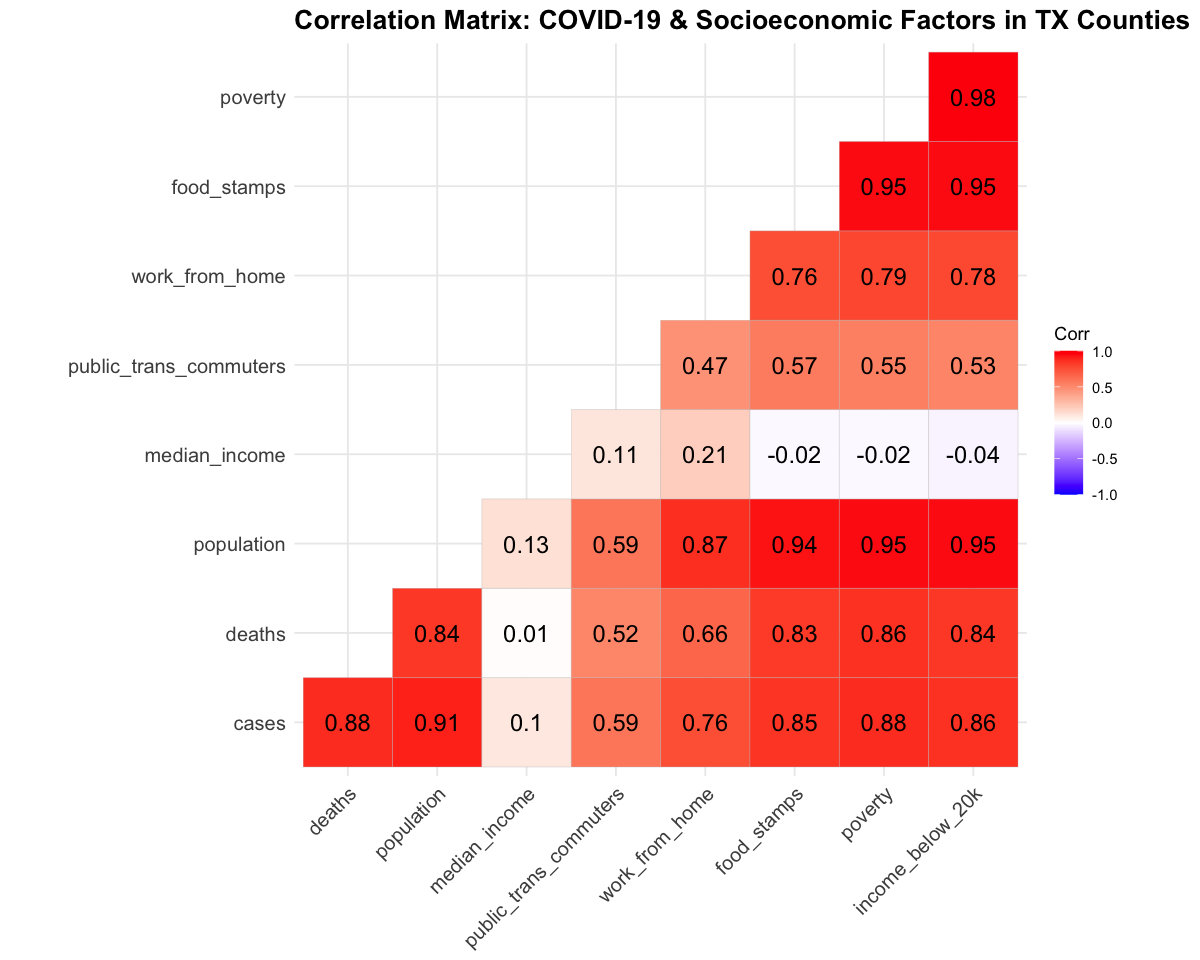

In [71]:
# Correlation Matrix
# Set figure size
options(repr.plot.width = 10, repr.plot.height = 8)
        
# Plot heatmap of correlation matrix
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix: COVID-19 & Socioeconomic Factors in TX Counties",
           lab_size = 5) +
    theme(
    plot.title = element_text(size = 16, face = "bold"),  
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),  
    axis.text.y = element_text(size = 12)  
  )

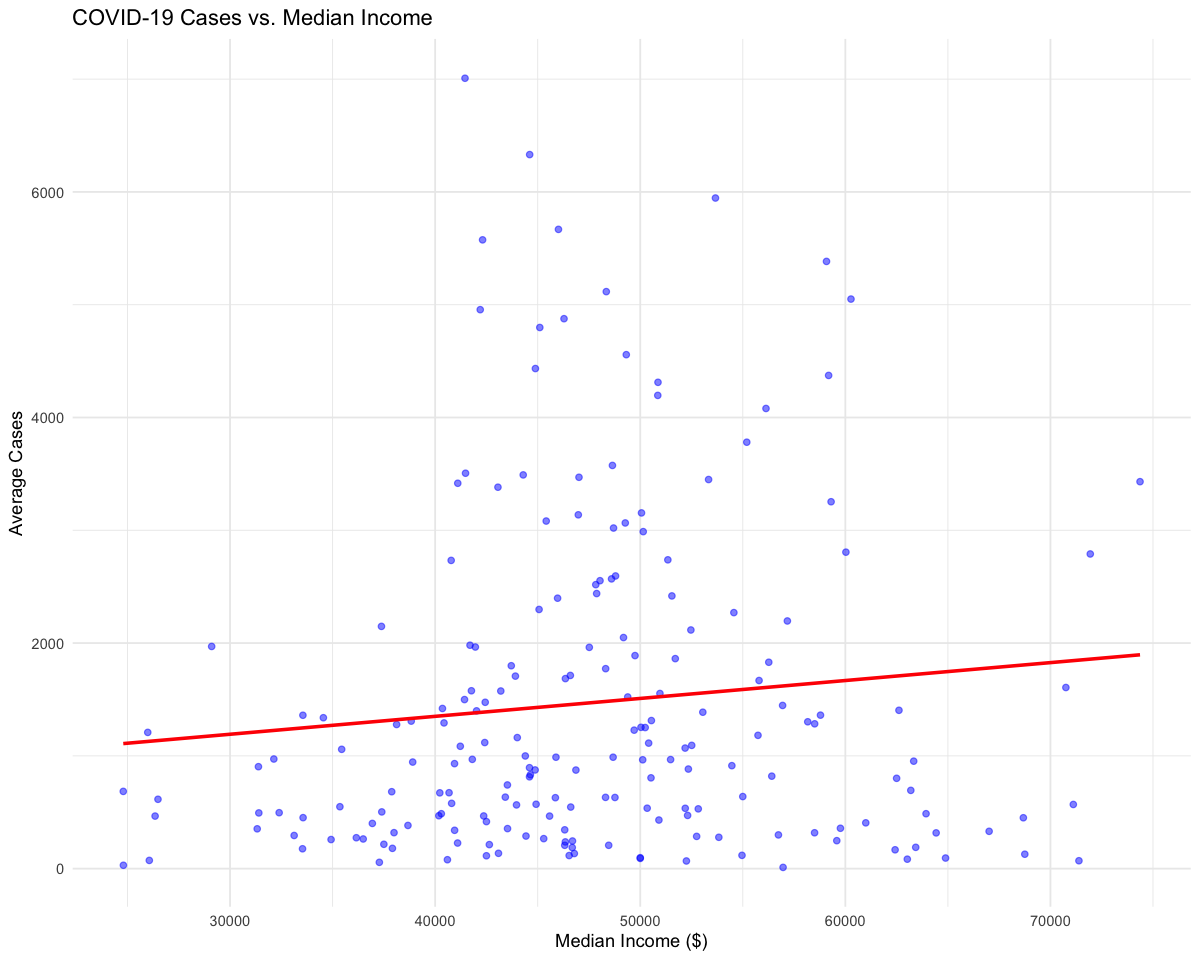

In [73]:
# Scatter Plot: COVID-19 Cases vs. Median Income
ggplot(county_covid_summary, aes(x = avg_income, y = avg_cases)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = FALSE) +
  labs(title = "COVID-19 Cases vs. Median Income",
       x = "Median Income ($)",
       y = "Average Cases") +
  theme_minimal()

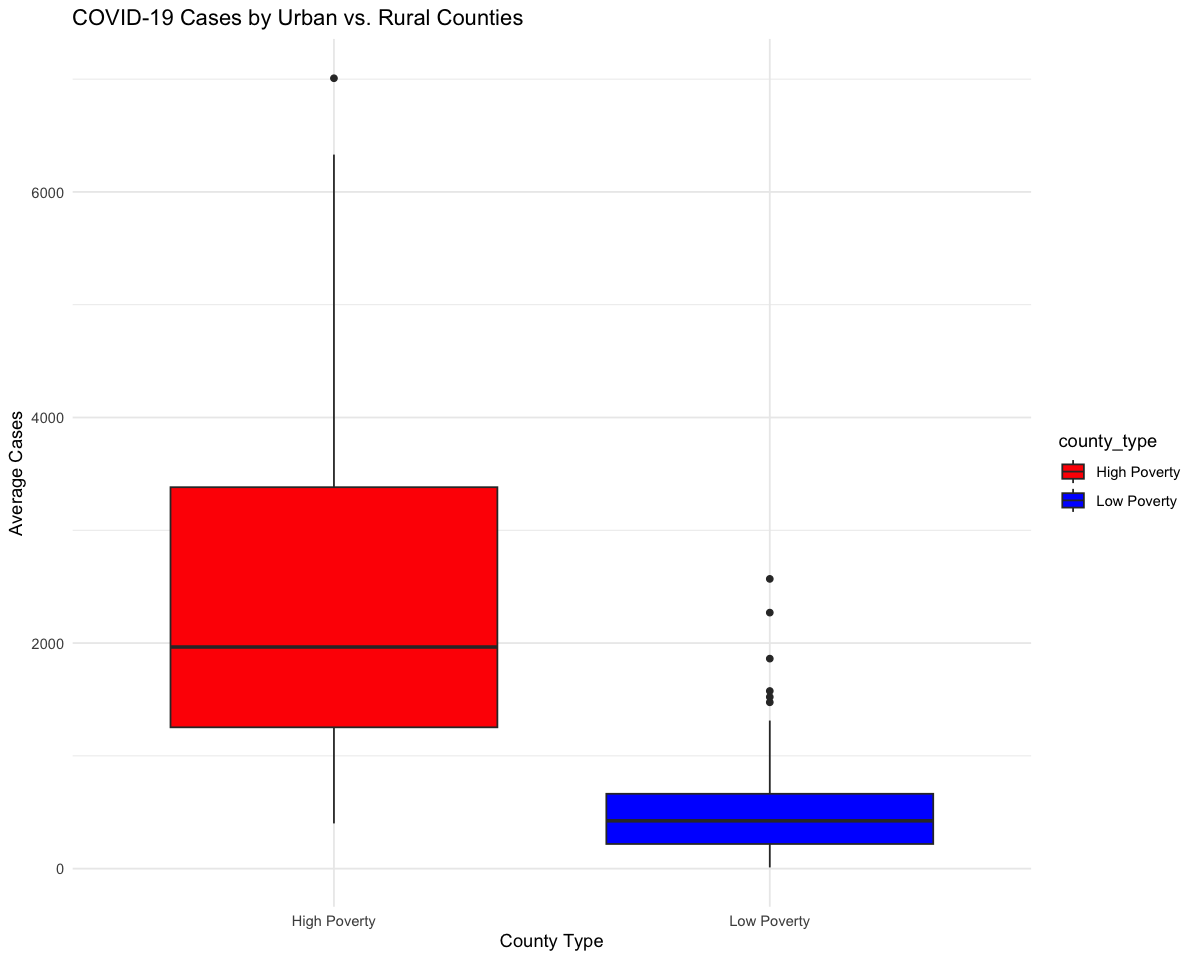

In [75]:
# Define urban vs. rural counties using median population size as a threshold
county_covid_summary <- county_covid_summary %>%
  mutate(county_type = ifelse(avg_poverty > median(avg_poverty, na.rm = TRUE), "High Poverty", "Low Poverty"))

# Box plot comparing case rates in urban vs. rural counties
ggplot(county_covid_summary, aes(x = county_type, y = avg_cases, fill = county_type)) +
  geom_boxplot() +
  labs(title = "COVID-19 Cases by Urban vs. Rural Counties",
       x = "County Type",
       y = "Average Cases") +
  scale_fill_manual(values = c("High Poverty" = "red", "Low Poverty" = "blue")) +
  theme_minimal()

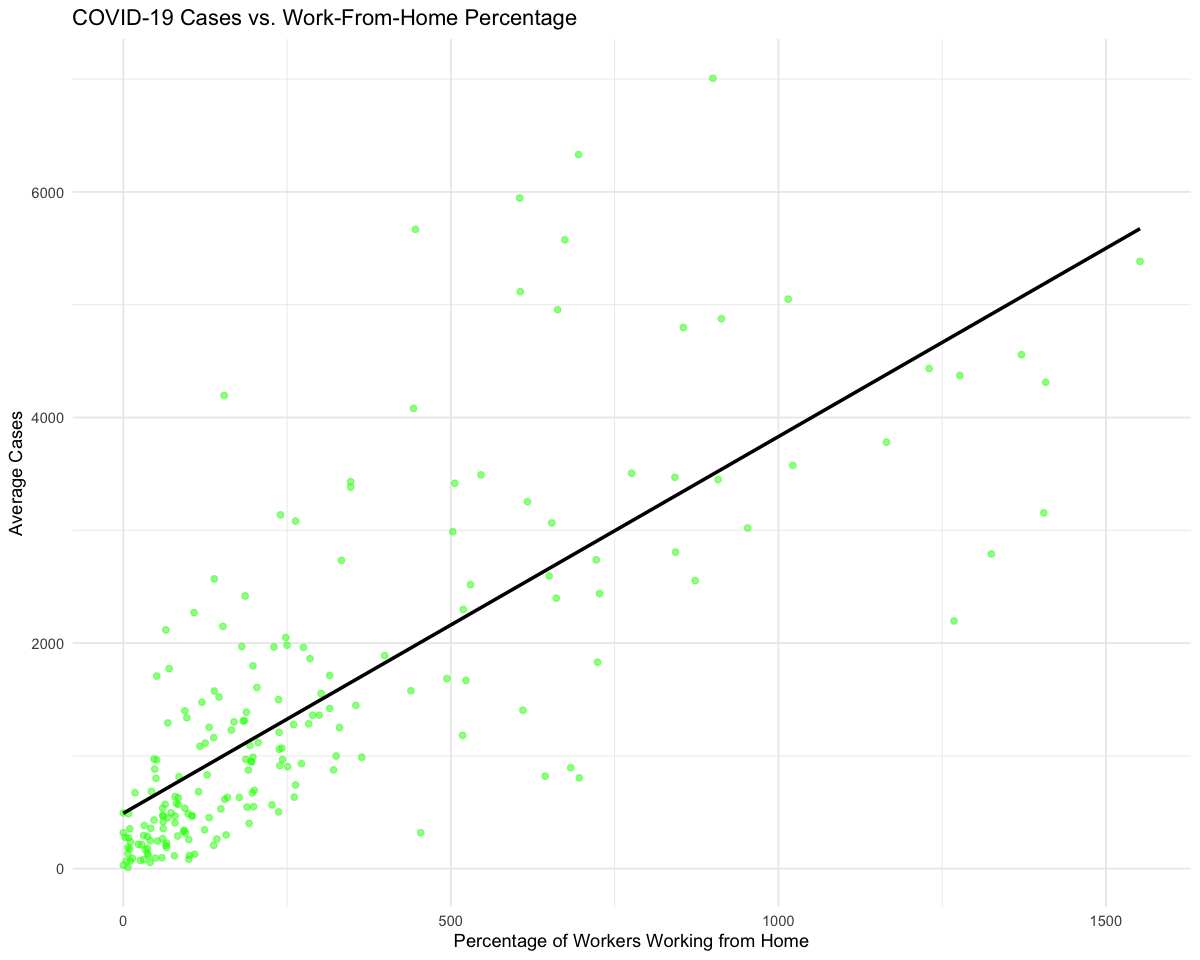

In [77]:
# Cases vs. Work-From-Home
ggplot(county_covid_summary, aes(x = avg_work_from_home, y = avg_cases)) +
  geom_point(alpha = 0.5, color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "black", se = FALSE) +
  labs(title = "COVID-19 Cases vs. Work-From-Home Percentage",
       x = "Percentage of Workers Working from Home",
       y = "Average Cases") +
  theme_minimal()

## Graduate-Level Analysis: by Salissa Hernandez

In [80]:
# Standardize key socioeconomic factors (z-scores)
covid_census_tx_cleaned <- covid_census_tx_cleaned %>%
  mutate(
    z_poverty = scale(poverty),
    z_public_trans = scale(public_trans_commuters),
    z_work_from_home = scale(work_from_home) 
  )

# Compute Socioeconomic Vulnerability Index
covid_census_tx_cleaned <- covid_census_tx_cleaned %>%
  mutate(vulnerability_index = (z_poverty + z_public_trans - z_work_from_home) / 3)

# View first few rows
head(covid_census_tx_cleaned %>% select(county, vulnerability_index, cases, deaths))

county,vulnerability_index,cases,deaths
<fct>,"<dbl[,1]>",<dbl>,<dbl>
Hansford County,-0.03626582,673,17
Stonewall County,-0.23398564,134,4
Cochran County,-0.09859347,216,12
Crockett County,-0.22126681,472,13
McCulloch County,-0.14350638,467,12
Sherman County,-0.14139175,118,11


In [82]:
# Compute correlation between the vulnerability index and COVID-19 cases & deaths
cor_vulnerability_cases <- cor(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$cases, use = "complete.obs")
cor_vulnerability_deaths <- cor(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$deaths, use = "complete.obs")

# Print correlation results
cat("Correlation between Vulnerability Index and Cases:", cor_vulnerability_cases, "\n")
cat("Correlation between Vulnerability Index and Deaths:", cor_vulnerability_deaths, "\n")

Correlation between Vulnerability Index and Cases: 0.5675032 
Correlation between Vulnerability Index and Deaths: 0.5643839 


In [84]:
# Test for statistical significance of correlation
cor.test(covid_census_tx_cleaned$vulnerability_index, covid_census_tx_cleaned$cases)


	Pearson's product-moment correlation

data:  covid_census_tx_cleaned$vulnerability_index and covid_census_tx_cleaned$cases
t = 9.7717, df = 201, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4662296 0.6540950
sample estimates:
      cor 
0.5675032 


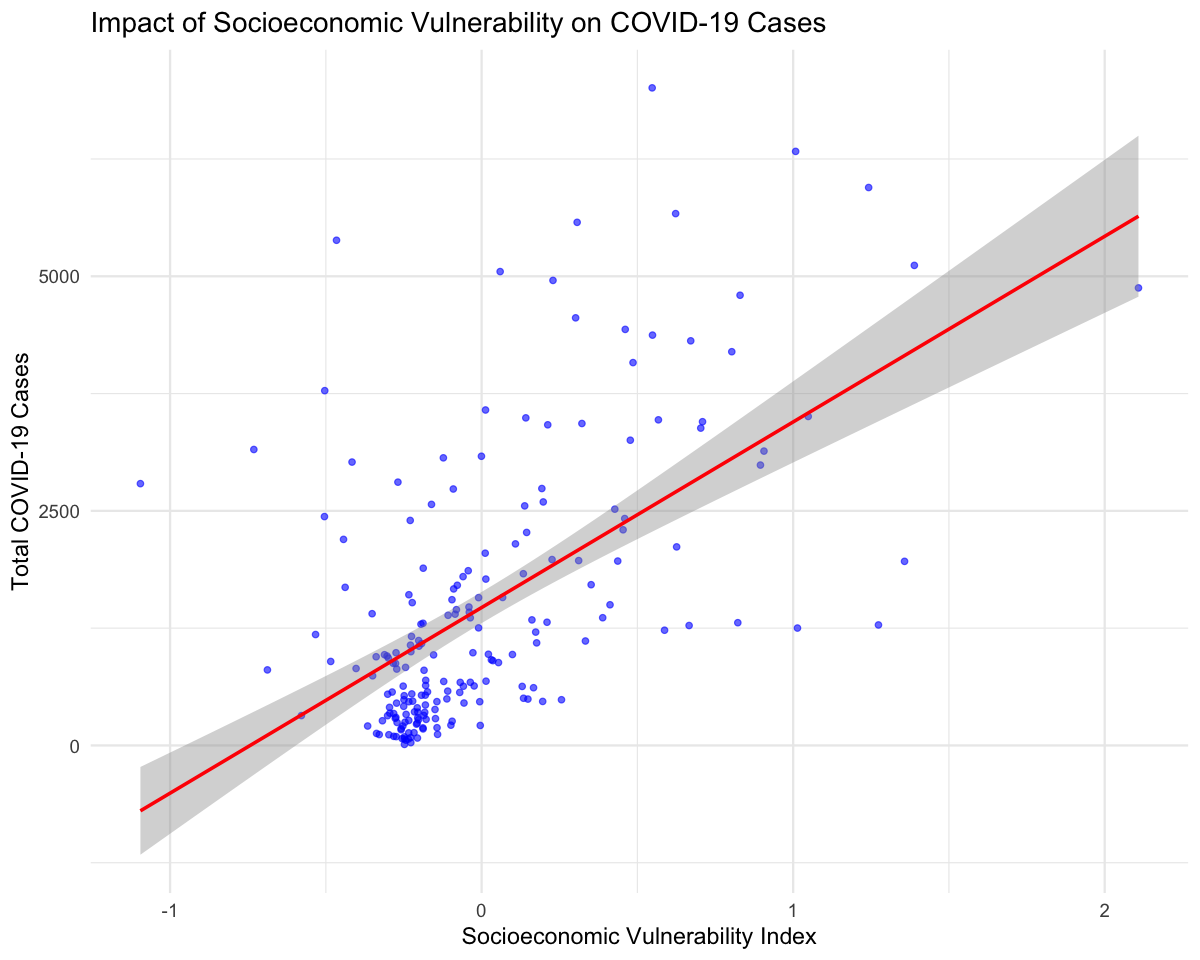

In [86]:
# Scatter plot of cases vs. vulnerability index
ggplot(covid_census_tx_cleaned, aes(x = vulnerability_index, y = cases)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", formula = 'y ~ x', color = "red") +
  theme_minimal(base_size = 14) +
  labs(title = "Impact of Socioeconomic Vulnerability on COVID-19 Cases",
       x = "Socioeconomic Vulnerability Index",
       y = "Total COVID-19 Cases")

In [88]:
# Select the top 10 most vulnerable counties
top_vulnerable_counties <- covid_census_tx_cleaned %>%
  arrange(desc(vulnerability_index)) %>%
  select(county, vulnerability_index, cases, deaths) %>%
  head(10)

# Display results
print(top_vulnerable_counties)

# A tibble: 10 × 4
   county             vulnerability_index[,1] cases deaths
   <fct>                                <dbl> <dbl>  <dbl>
 1 Bowie County                         2.11   4876    139
 2 Liberty County                       1.39   5116    111
 3 Gonzales County                      1.36   1962     29
 4 Jackson County                       1.27   1284     23
 5 Orange County                        1.24   5946     81
 6 Nacogdoches County                   1.05   3506    111
 7 Colorado County                      1.01   1251     17
 8 Val Verde County                     1.01   6331    158
 9 Titus County                         0.906  3137     60
10 Wharton County                       0.895  2988     84


Warning message:
“attributes are not identical across measure variables; they will be dropped”


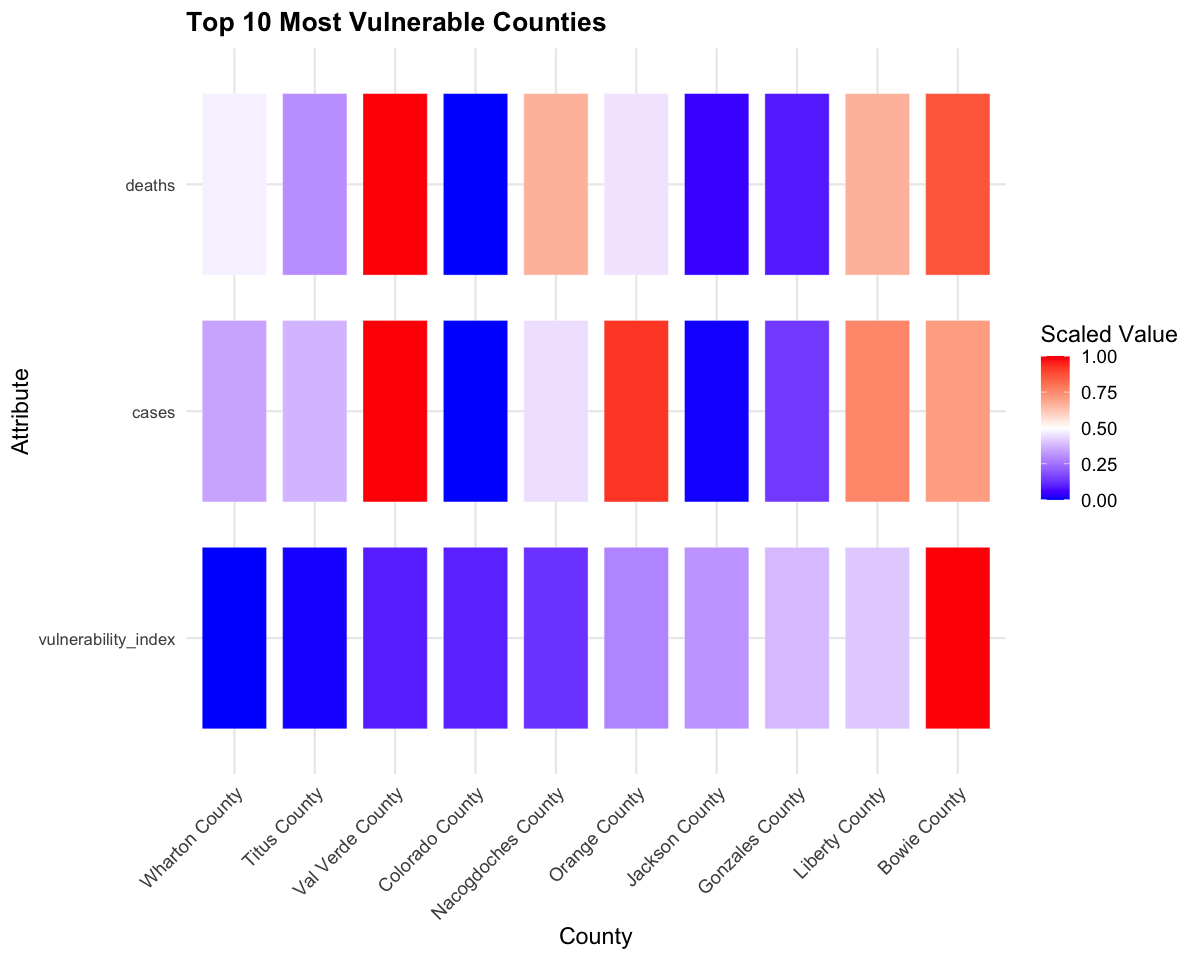

In [90]:
# Heatmap 10 most vulnerable counties

# Scale vulnerability
top_vulnerable_counties$vulnerability_index <- scales::rescale(top_vulnerable_counties$vulnerability_index)
top_vulnerable_counties$cases <- scales::rescale(top_vulnerable_counties$cases)
top_vulnerable_counties$deaths <- scales::rescale(top_vulnerable_counties$deaths)

# Melt data
heatmap_melted <- melt(top_vulnerable_counties, id.vars = "county")

# Order counties by vulnerability index
heatmap_melted$county <- factor(heatmap_melted$county, 
                                levels = top_vulnerable_counties$county[order(top_vulnerable_counties$vulnerability_index)])

# Plot heatmap
ggplot(heatmap_melted, aes(x = county, y = variable, fill = value)) +
  geom_tile(color = "white", width = 0.8, height = 0.8) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.5) +
  labs(title = "Top 10 Most Vulnerable Counties",
       x = "County",
       y = "Attribute",
       fill = "Scaled Value") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 10),
        plot.title = element_text(size = 16, face = "bold"))

In [98]:
# Pearson correlation
cor_pearson <- cor(covid_census_tx_cleaned[c("cases", "poverty", "median_income", "work_from_home")], 
                   use = "complete.obs", method = "pearson")

cat("\nPearson Correlation Results\n")
cat("---------------------------------------------------\n")
for (i in 1:nrow(cor_pearson)) {
  for (j in 1:ncol(cor_pearson)) {
    cat(sprintf("%-20s vs %-20s: %.4f\n", 
                rownames(cor_pearson)[i], 
                colnames(cor_pearson)[j], 
                cor_pearson[i, j]))
  }
}
cat("---------------------------------------------------\n\n")


Pearson Correlation Results
---------------------------------------------------
cases                vs cases               : 1.0000
cases                vs poverty             : 0.8789
cases                vs median_income       : 0.1049
cases                vs work_from_home      : 0.7579
poverty              vs cases               : 0.8789
poverty              vs poverty             : 1.0000
poverty              vs median_income       : -0.0152
poverty              vs work_from_home      : 0.7934
median_income        vs cases               : 0.1049
median_income        vs poverty             : -0.0152
median_income        vs median_income       : 1.0000
median_income        vs work_from_home      : 0.2072
work_from_home       vs cases               : 0.7579
work_from_home       vs poverty             : 0.7934
work_from_home       vs median_income       : 0.2072
work_from_home       vs work_from_home      : 1.0000
---------------------------------------------------



In [100]:
# Spearman correlation
cor_spearman <- cor(covid_census_tx_cleaned[c("cases", "poverty", "median_income", "work_from_home")], 
                    use = "complete.obs", method = "spearman")

cat("\nSpearman Correlation Results\n")
cat("---------------------------------------------------\n")
for (i in 1:nrow(cor_spearman)) {
  for (j in 1:ncol(cor_spearman)) {
    cat(sprintf("%-20s vs %-20s: %.4f\n", 
                rownames(cor_spearman)[i], 
                colnames(cor_spearman)[j], 
                cor_spearman[i, j]))
  }
}
cat("---------------------------------------------------\n\n")


Spearman Correlation Results
---------------------------------------------------
cases                vs cases               : 1.0000
cases                vs poverty             : 0.9239
cases                vs median_income       : 0.1140
cases                vs work_from_home      : 0.8097
poverty              vs cases               : 0.9239
poverty              vs poverty             : 1.0000
poverty              vs median_income       : -0.0217
poverty              vs work_from_home      : 0.8427
median_income        vs cases               : 0.1140
median_income        vs poverty             : -0.0217
median_income        vs median_income       : 1.0000
median_income        vs work_from_home      : 0.1779
work_from_home       vs cases               : 0.8097
work_from_home       vs poverty             : 0.8427
work_from_home       vs median_income       : 0.1779
work_from_home       vs work_from_home      : 1.0000
---------------------------------------------------



In [112]:
#### COVID-19 Cases by Poverty Level

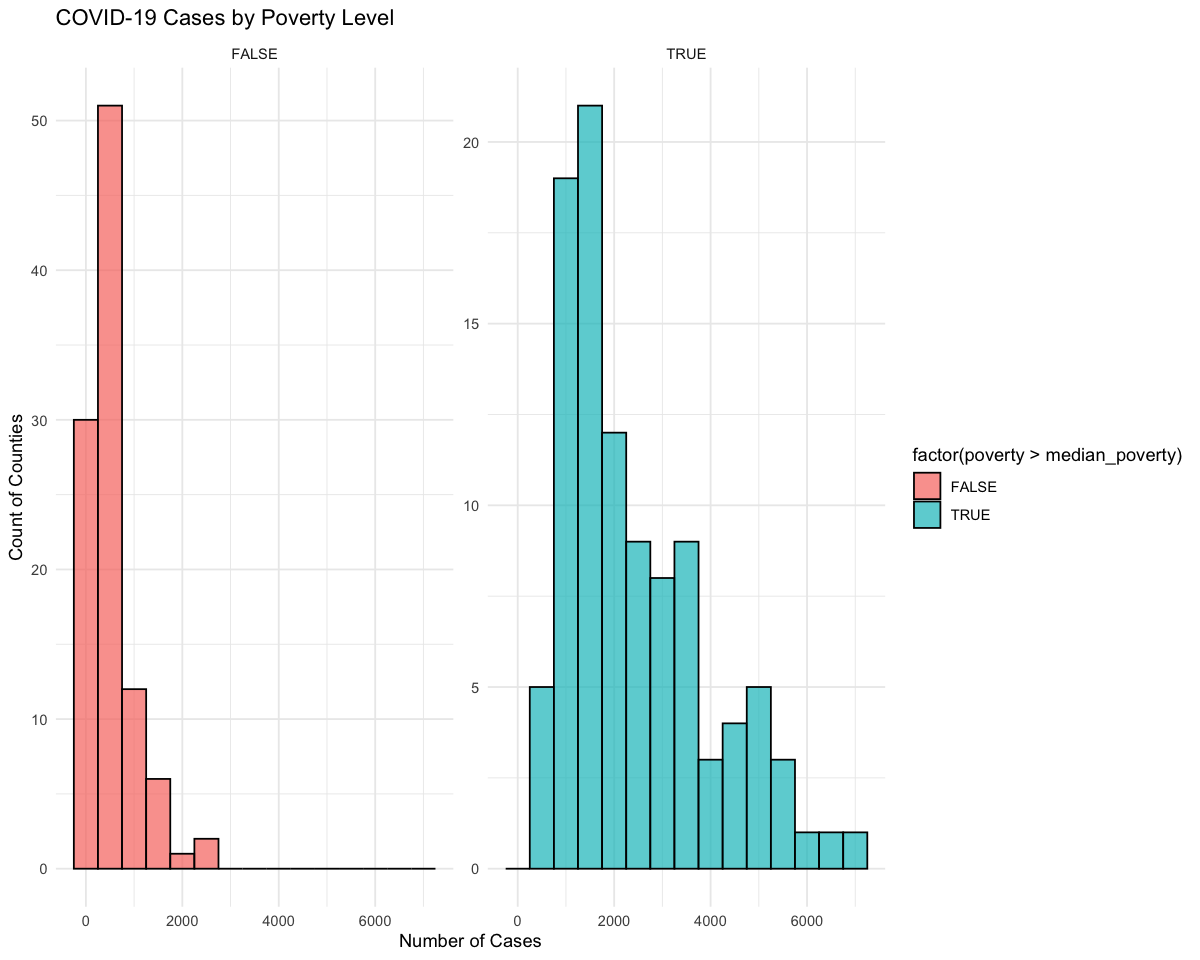

In [105]:
# get median poverty
median_poverty <- median(covid_census_tx_cleaned$poverty, na.rm = TRUE)

# histogram cases by poverty level
ggplot(covid_census_tx_cleaned, aes(x = cases, fill = factor(poverty > median_poverty))) +
  geom_histogram(binwidth = 500, color = "black", alpha = 0.7) +
  facet_wrap(~ factor(poverty > median_poverty), scales = "free_y") +
  labs(title = "COVID-19 Cases by Poverty Level",
       x = "Number of Cases",
       y = "Count of Counties") +
  theme_minimal()

#### K means clustering

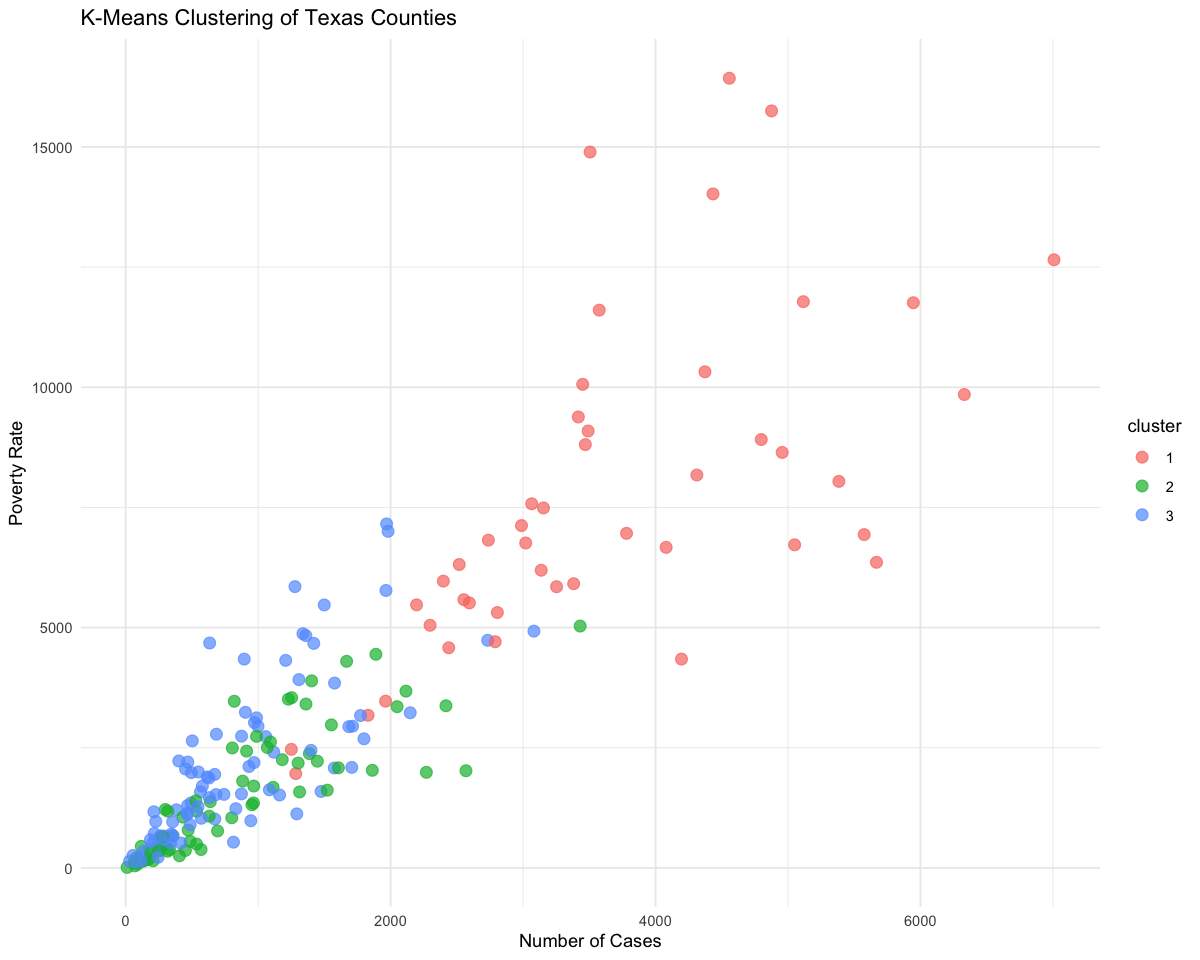

In [107]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

set.seed(123) # For reproducibility

# Select relevant variables and scale them
cluster_data <- covid_census_tx_cleaned %>%
  select(cases, poverty, median_income, work_from_home, public_trans_commuters) %>%
  scale()

# Fit k-means with 3 clusters
kmeans_result <- kmeans(cluster_data, centers = 3)

# Add cluster results to the data
covid_census_tx_cleaned$cluster <- as.factor(kmeans_result$cluster)

# Plot the clusters
ggplot(covid_census_tx_cleaned, aes(x = cases, y = poverty, color = cluster)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "K-Means Clustering of Texas Counties",
       x = "Number of Cases",
       y = "Poverty Rate") +
  theme_minimal()